<h2 style='background:blue; border:0; color:white'><center> Load Libraries </center><h2>

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle 

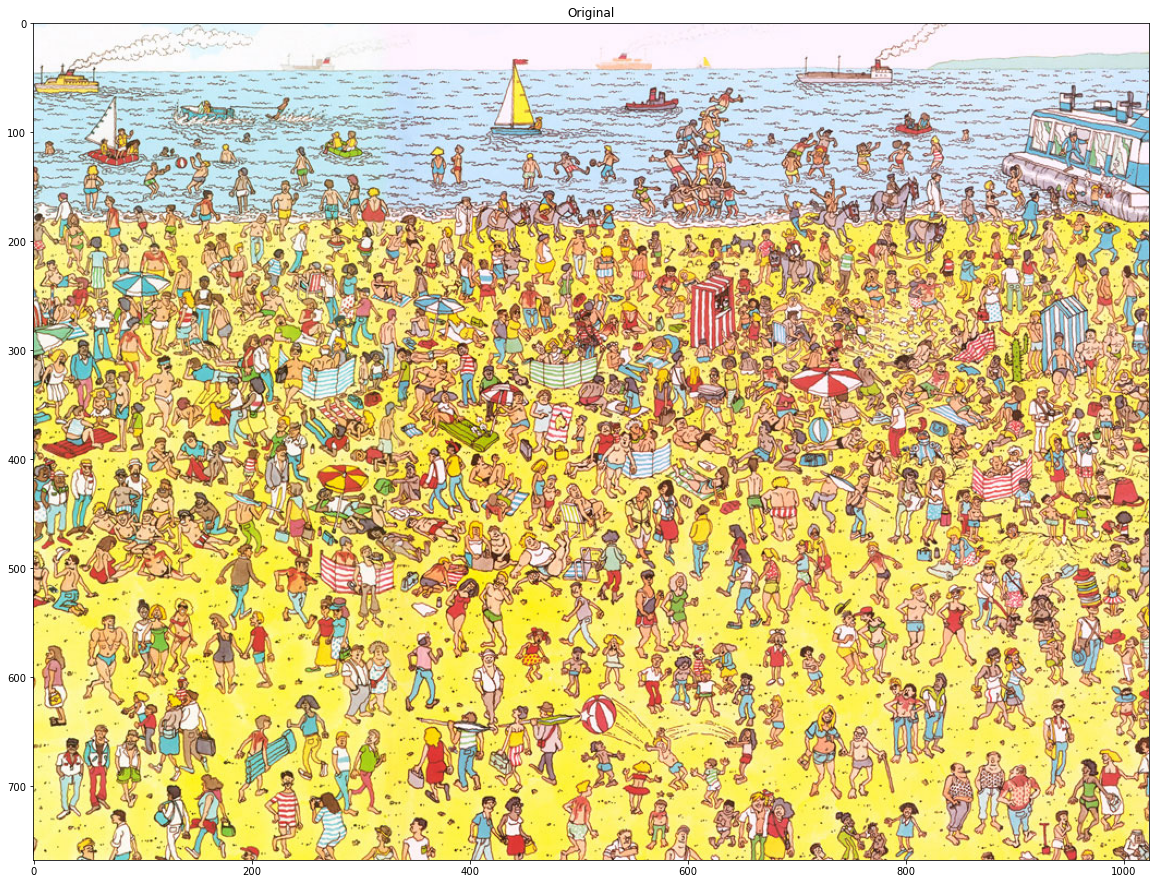

In [7]:
plt.figure(figsize=(20, 20))
plt.title("Original")
plt.imshow(mpimg.imread('../input/opencv-samples-images/WaldoBeach.jpg'))
plt.show()


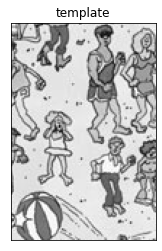

In [8]:


img = cv.imread('../input/opencv-samples-images/WaldoBeach.jpg',0)

template =img[500:650, 500:600]
# template =img[500:650, 200:300]
plt.imshow(template,cmap = 'gray')
plt.title('template'), plt.xticks([]), plt.yticks([])

plt.show()


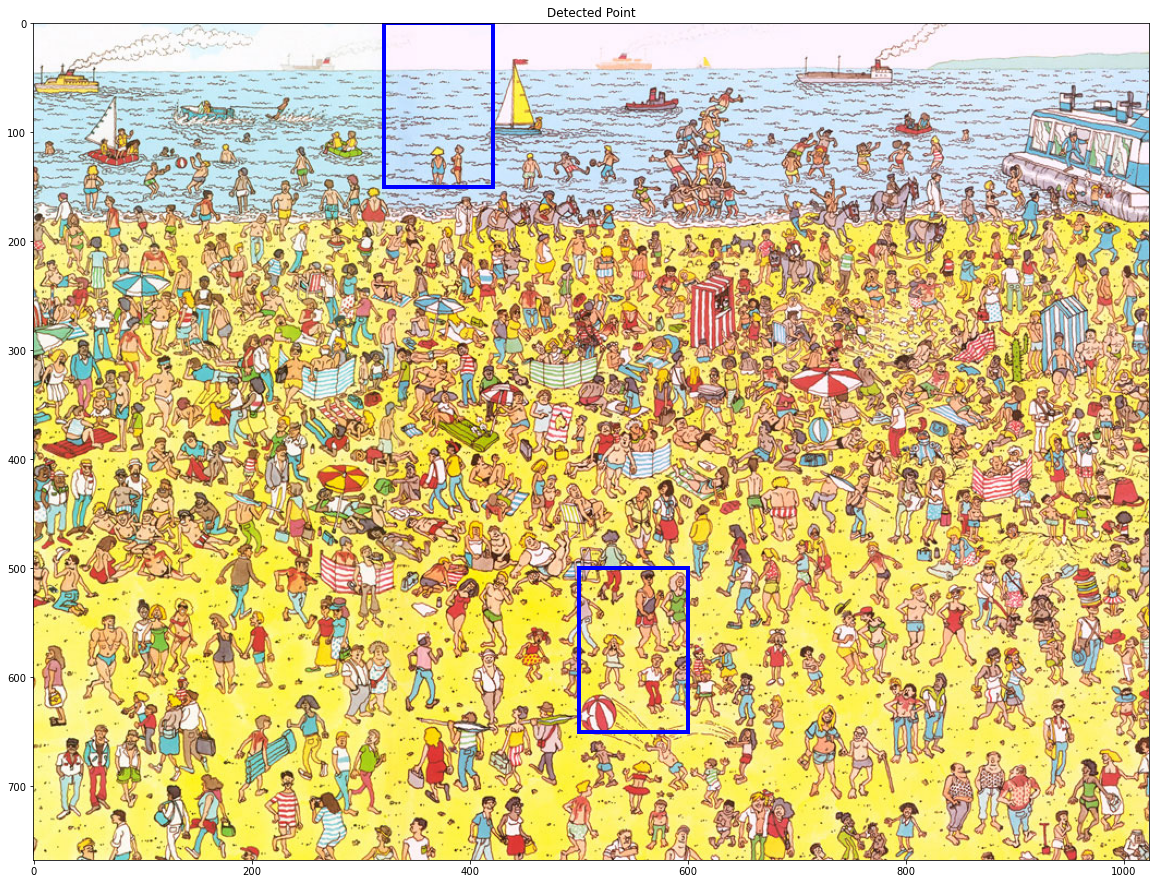

In [9]:
img2 = img.copy()
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
plt.figure(figsize=(20, 20))
plt.imshow(mpimg.imread('../input/opencv-samples-images/WaldoBeach.jpg'))
plt.title('Detected Point')
result=[]

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    result+=[(meth,top_left,w,   h)]
 
    ax = plt.gca()
    ax.add_patch( Rectangle(top_left, 
                       w,   h,
                        fc ='none',  
                        ec ='b', 
                        lw = 4) ) 

    
plt.show()
    

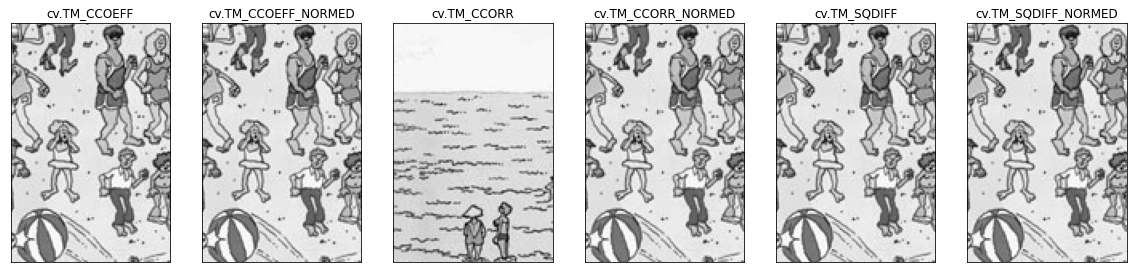

In [10]:
index=160
plt.figure(figsize=(20, 20))
for r in result:
    index+=1
    plt.subplot(index),plt.imshow(res,cmap = 'gray')
    template =img[ r[1][1]:r[1][1]+r[3], r[1][0]: r[1][0]+r[2]]
    plt.imshow(template,cmap = 'gray')
    plt.title(r[0]), plt.xticks([]), plt.yticks([])

plt.show()

<h2 style='background:blue; border:0; color:white'><center> References </center><h2>

* https://docs.opencv.org/master/df/dfb/group__imgproc__object.html
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html

  **Thankyou for Reading and Do Upvote If you liked !!!**